<a href="https://colab.research.google.com/github/mostafasameer-transportation/CARLA-Manual-Control-Steering-Wheel/blob/main/Structural%20Dynamics_HW-06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

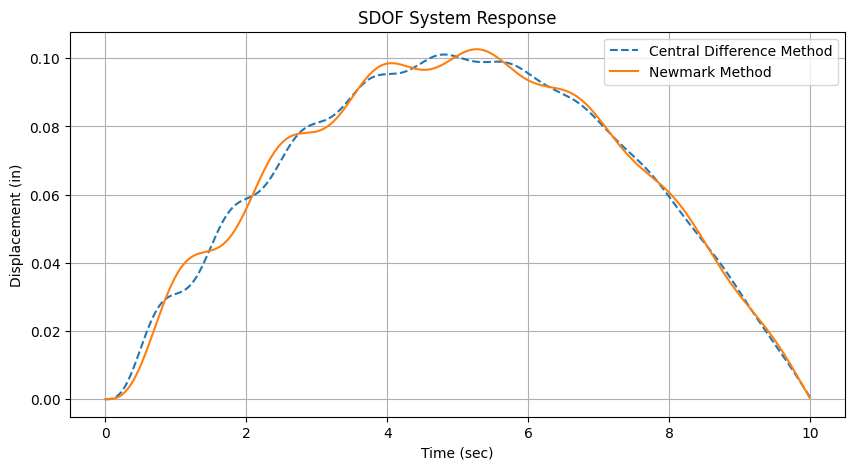

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 0.2533  # kip-sec^2/in
k = 10  # kips/in
wn = 6.283  # rad/sec (natural frequency)
Tn = 1  # sec (natural period)
xi = 0.05  # damping ratio
dt = 0.005  # time step in sec
T_force = 10  # duration of force in sec
c = 2 * xi * wn * m  # damping coefficient

# Time vector
t = np.arange(0, T_force, dt)

# Define half-cycle sine pulse force p(t)
P0 = 1  # Assume a peak force of 1 kip for normalization
p_t = P0 * np.sin(np.pi * t / T_force) * (t <= T_force)

# System matrices
M = m
K = k
C = c

# Number of time steps
n = len(t)

# Initialize displacement, velocity, and acceleration
u_central = np.zeros(n)
u_newmark = np.zeros(n)
v_newmark = np.zeros(n)
a_newmark = np.zeros(n)

# Initial conditions
u_central[0] = 0
u_newmark[0] = 0
v_newmark[0] = 0
a_newmark[0] = (p_t[0] - C * v_newmark[0] - K * u_newmark[0]) / M

# Central Difference Method
u_central[1] = u_central[0]  # Assuming initial velocity is zero

for i in range(1, n - 1):
    u_central[i + 1] = (dt ** 2 / M) * (p_t[i] - C * (u_central[i] - u_central[i - 1]) / dt - K * u_central[i]) + 2 * u_central[i] - u_central[i - 1]

# Newmark Method parameters (β = 1/4, γ = 1/2 for average acceleration)
beta = 1 / 4
gamma = 1 / 2

# Effective stiffness
Ke = K + gamma / (beta * dt) * C + 1 / (beta * dt ** 2) * M

# Newmark Method time integration
for i in range(n - 1):
    P_eff = p_t[i + 1] + M * (u_newmark[i] / (beta * dt ** 2) + v_newmark[i] / (beta * dt) + (1 / (2 * beta) - 1) * a_newmark[i]) + C * (gamma / (beta * dt) * u_newmark[i] + (gamma / beta - 1) * v_newmark[i] + dt * (gamma / (2 * beta) - 1) * a_newmark[i])

    u_newmark[i + 1] = P_eff / Ke
    a_newmark[i + 1] = (u_newmark[i + 1] - u_newmark[i]) / (beta * dt ** 2) - v_newmark[i] / (beta * dt) - (1 / (2 * beta)) * a_newmark[i]
    v_newmark[i + 1] = v_newmark[i] + dt * ((1 - gamma) * a_newmark[i] + gamma * a_newmark[i + 1])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, u_central, label="Central Difference Method", linestyle="dashed")
plt.plot(t, u_newmark, label="Newmark Method", linestyle="solid")
plt.xlabel("Time (sec)")
plt.ylabel("Displacement (in)")
plt.title("SDOF System Response")
plt.legend()
plt.grid()
plt.show()


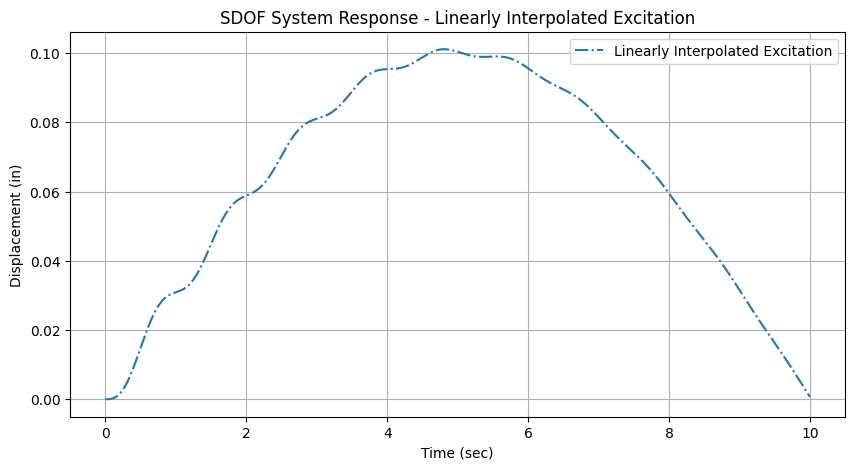

In [4]:
from scipy.interpolate import interp1d

# Interpolating force values
force_interp = interp1d(t, p_t, kind='linear', fill_value="extrapolate")
p_interp = force_interp(t)  # Get interpolated force values

# Initialize displacement for interpolated excitation method
u_interp = np.zeros(n)

# Solve using Central Difference with interpolated excitation
for i in range(1, n - 1):
    u_interp[i + 1] = (dt ** 2 / M) * (p_interp[i] - C * (u_interp[i] - u_interp[i - 1]) / dt - K * u_interp[i]) + 2 * u_interp[i] - u_interp[i - 1]

# Plot results with interpolated excitation
plt.figure(figsize=(10, 5))
plt.plot(t, u_interp, label="Linearly Interpolated Excitation", linestyle="dashdot")
plt.xlabel("Time (sec)")
plt.ylabel("Displacement (in)")
plt.title("SDOF System Response - Linearly Interpolated Excitation")
plt.legend()
plt.grid()
plt.show()


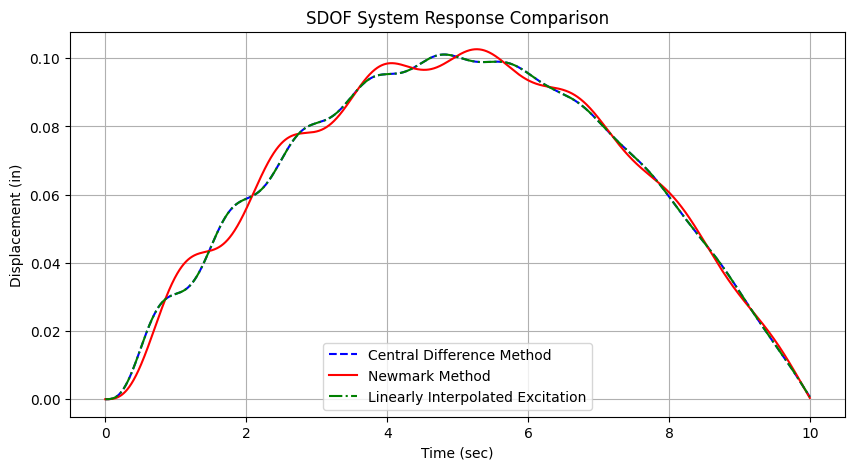

In [6]:
# Recompute Central Difference Method to ensure accuracy
u_central = np.zeros(n)
u_central[1] = u_central[0]  # Assuming initial velocity is zero

for i in range(1, n - 1):
    u_central[i + 1] = (dt ** 2 / M) * (p_t[i] - C * (u_central[i] - u_central[i - 1]) / dt - K * u_central[i]) + 2 * u_central[i] - u_central[i - 1]

# Plot all three methods again
plt.figure(figsize=(10, 5))
plt.plot(t, u_central, label="Central Difference Method", linestyle="dashed", color='blue')
plt.plot(t, u_newmark, label="Newmark Method", linestyle="solid", color='red')
plt.plot(t, u_interp, label="Linearly Interpolated Excitation", linestyle="dashdot", color='green')

plt.xlabel("Time (sec)")
plt.ylabel("Displacement (in)")
plt.title("SDOF System Response Comparison")
plt.legend()
plt.grid()
plt.show()

